In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
from scipy import ndimage
from scipy.optimize import minimize
from PIL import Image
from skimage.external.tifffile import imsave
import os
import fnmatch

# Utilities
from fitting import Fit_Gaussian
from pattern import Lattice, Squares, Binary_Squares
from binary import Binary_Images

The number of mini images for cell_3 = 90


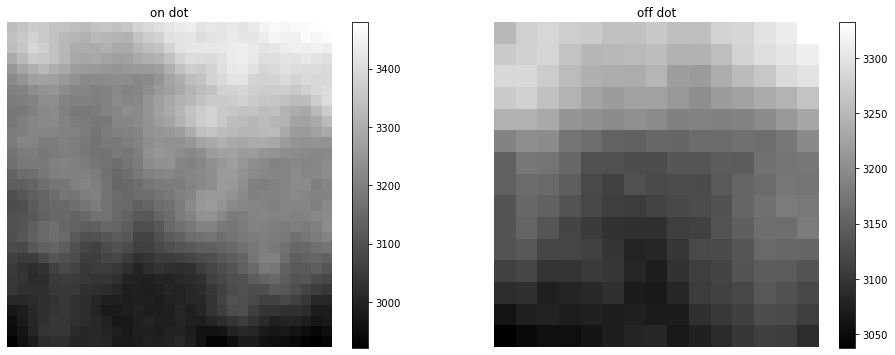

The number of mini images for cell_10 = 84


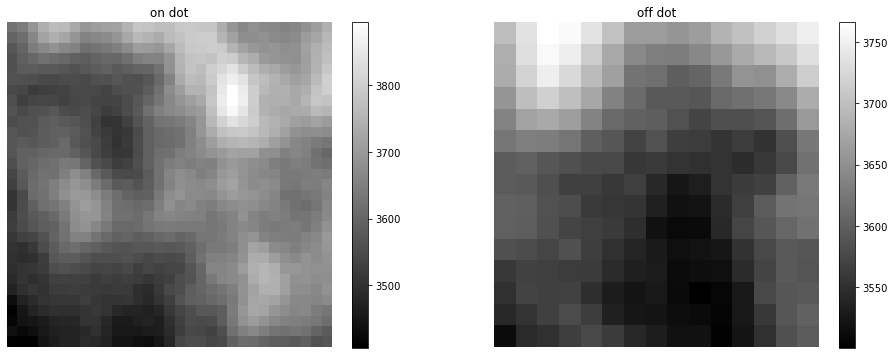

The number of mini images for cell_5 = 88


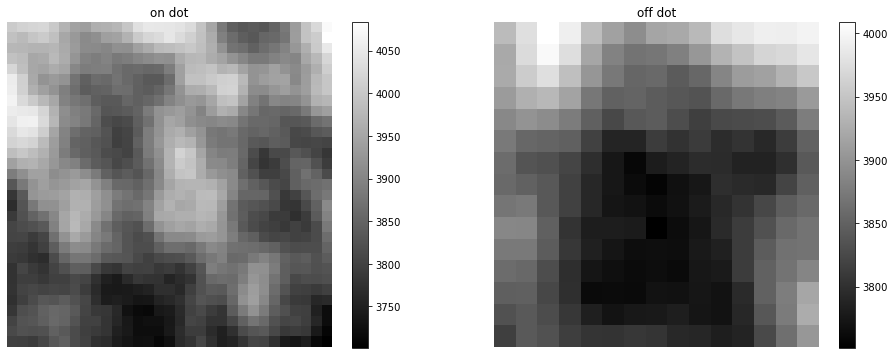

The number of mini images for cell_14 = 112


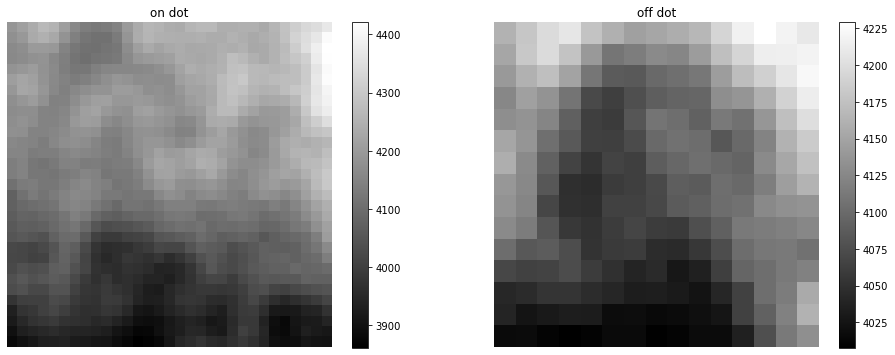

The number of mini images for cell_16 = 184


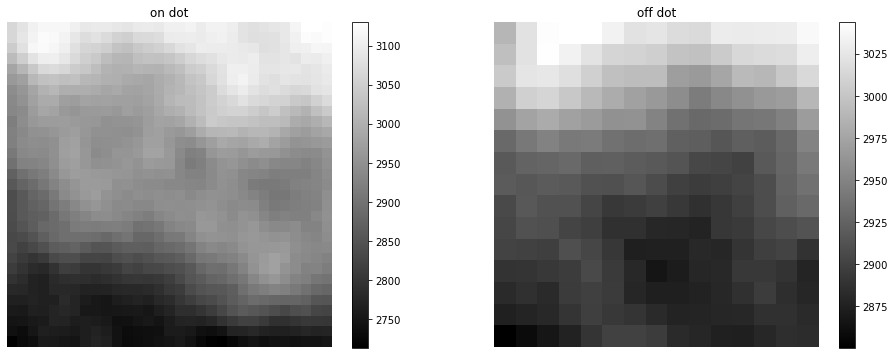

The number of mini images for cell_12 = 82


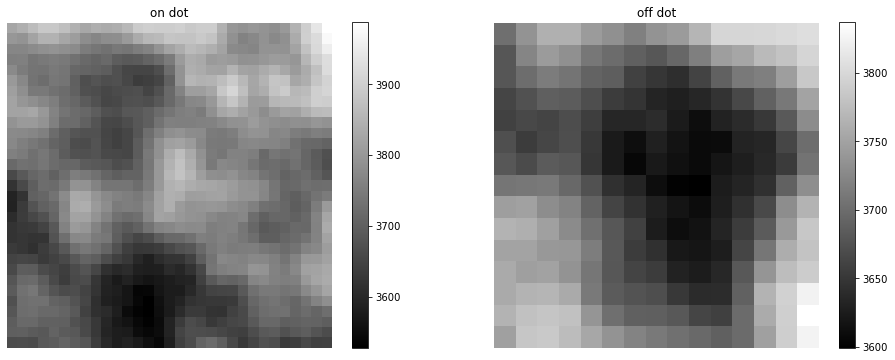

The number of mini images for cell_15 = 100


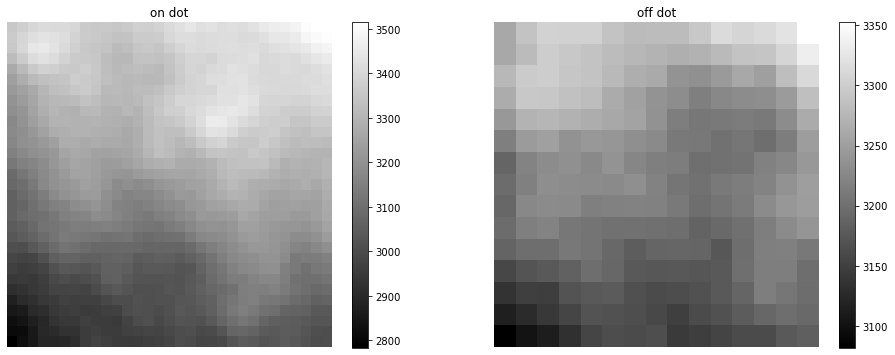

The number of mini images for cell_9 = 158


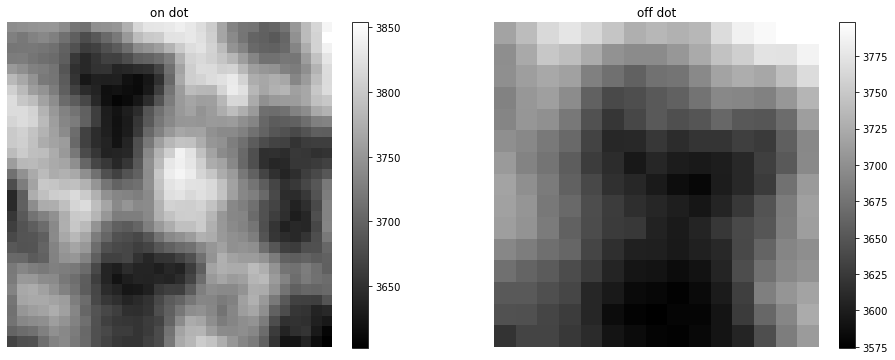

The number of mini images for cell_8 = 122


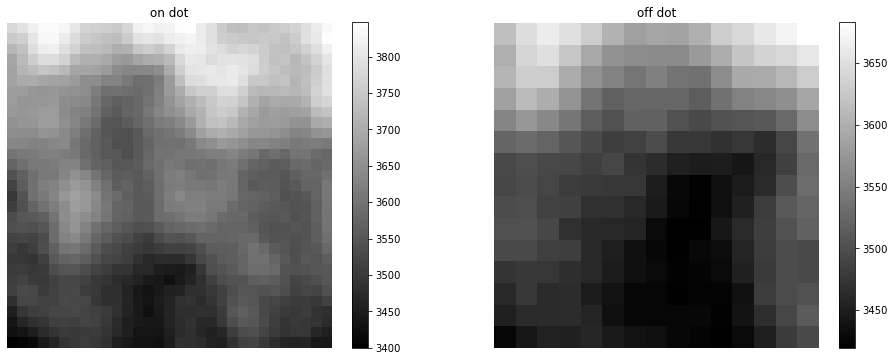

The number of mini images for cell_13 = 100


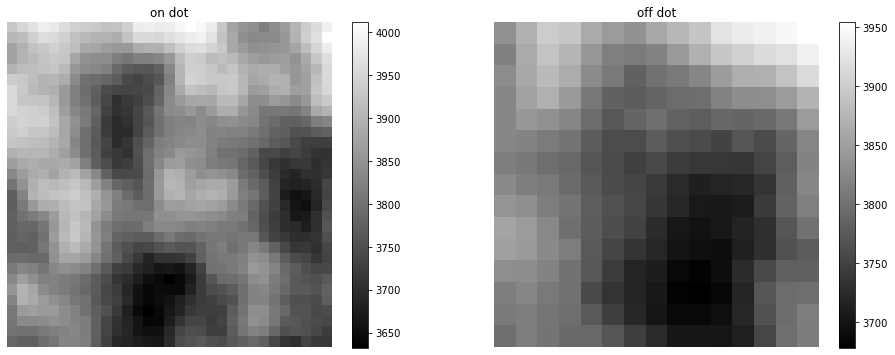

The number of mini images for cell_2 = 36


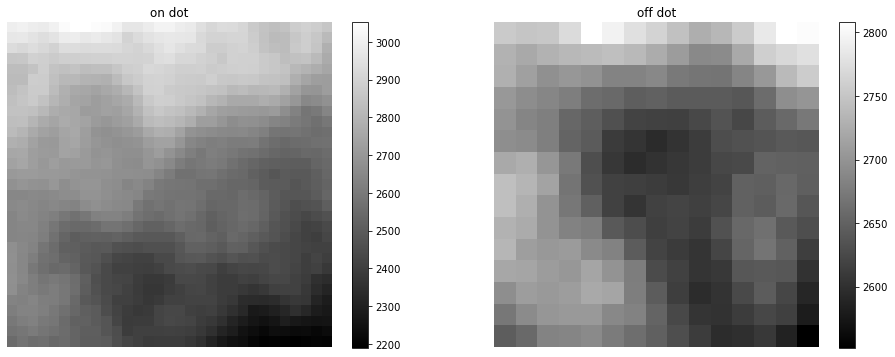

The number of mini images for cell_4 = 54


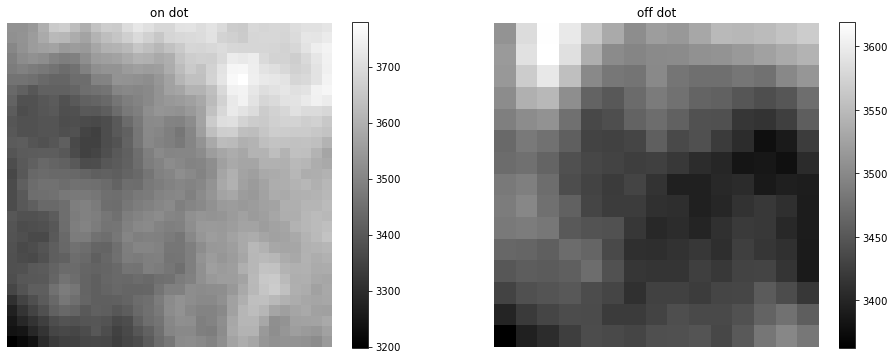

The number of mini images for cell_3 = 56


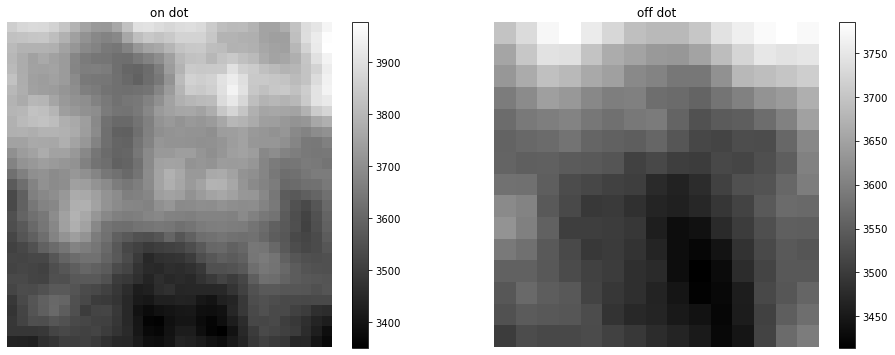

The number of mini images for cell_10 = 104


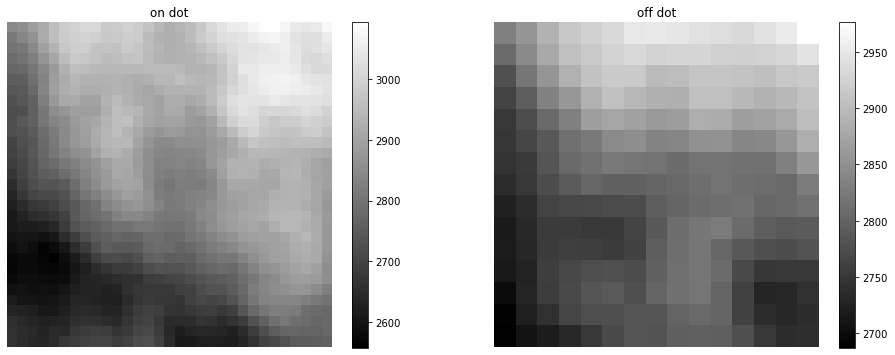

The number of mini images for cell_20 = 88


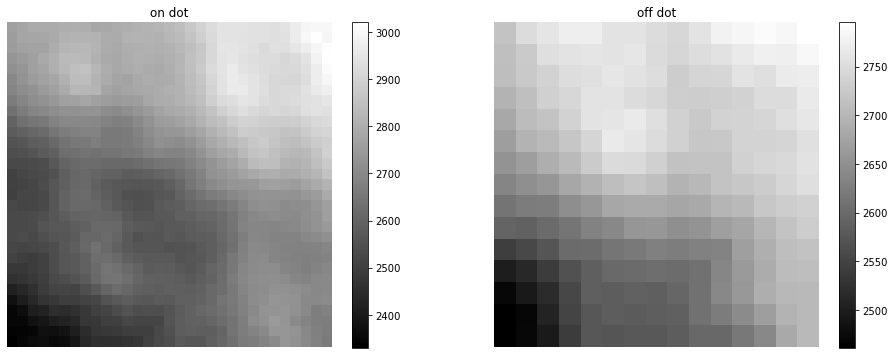

The number of mini images for cell_6 = 186


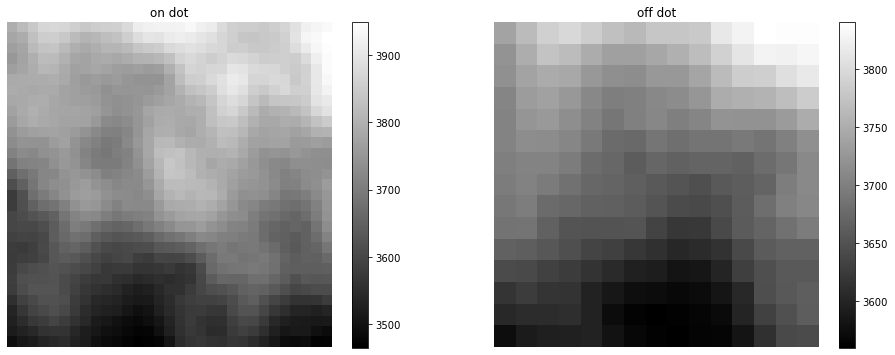

The number of mini images for cell_19 = 120


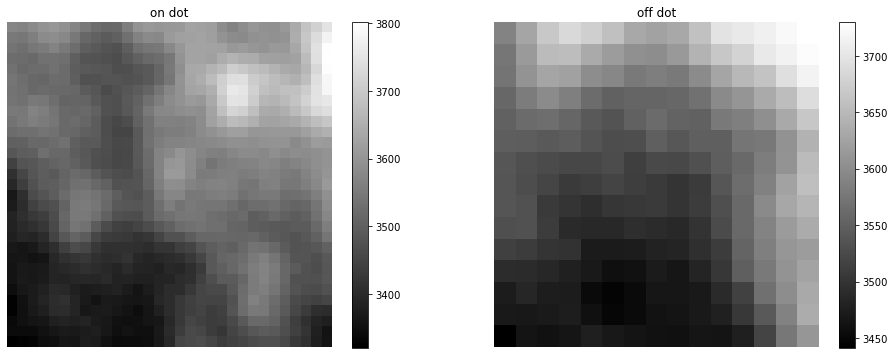

The number of mini images for cell_5 = 116


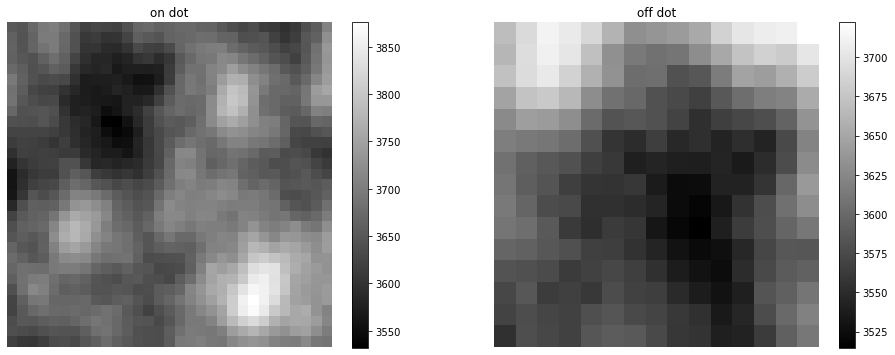

The number of mini images for cell_14 = 150


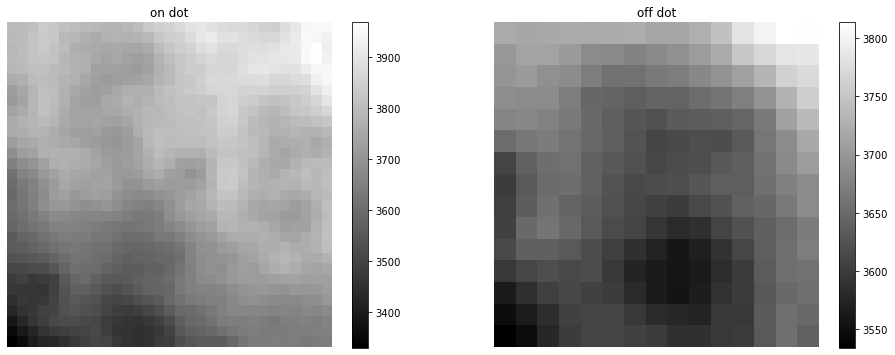

The number of mini images for cell_16 = 94


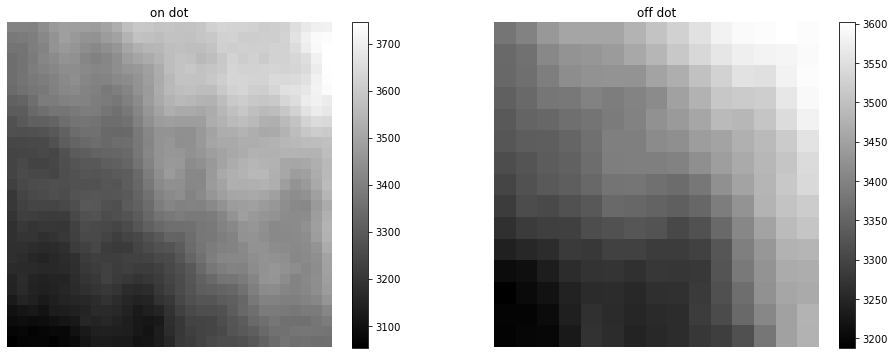

The number of mini images for cell_11 = 112


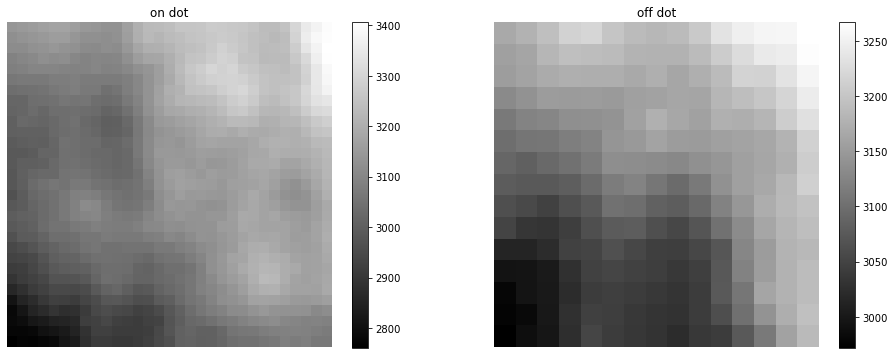

The number of mini images for cell_15 = 72


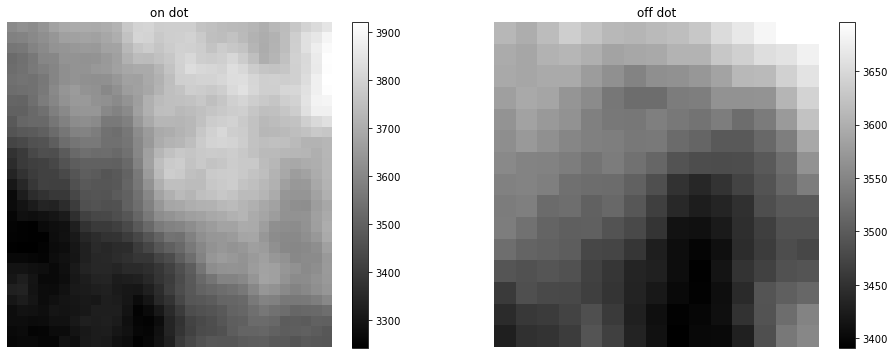

The number of mini images for cell_17 = 80


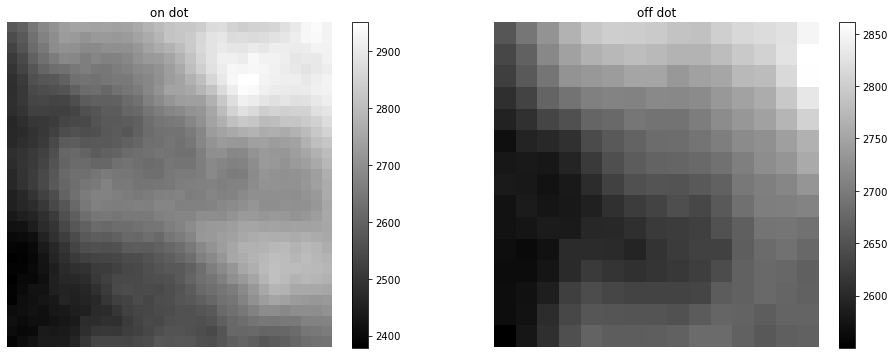

The number of mini images for cell_7 = 66


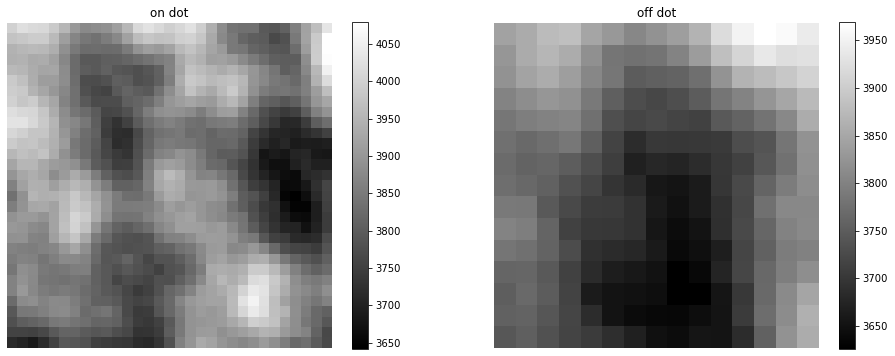

The number of mini images for cell_9 = 110


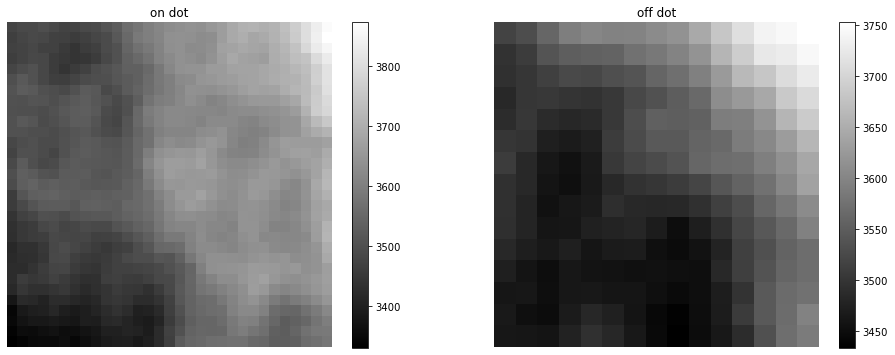

The number of mini images for cell_13 = 76


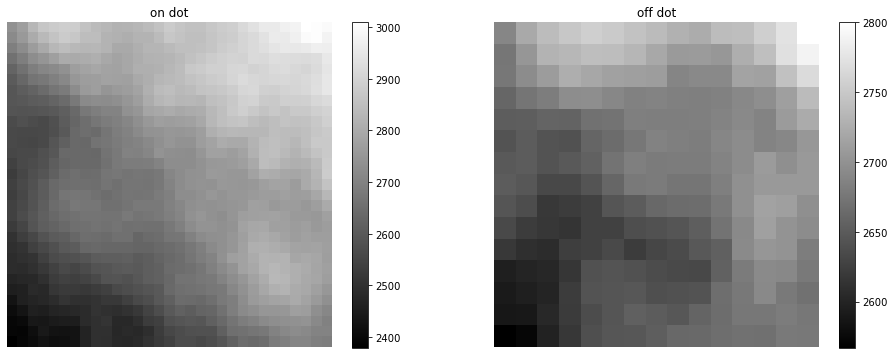

In [2]:
actin = "actin.tif"
mask = "Mask.tif"
pattern = "pattern.tif"
l = 30
l_min = 1.5
l_max = 2.5
img_scale = 10

# Localize each dot on a fack lattice and make shifted set of dots
lattice = Lattice(coordinates = 'data/{}/{}/coordinates.csv'.format('data_20190208', 'cell_1_1'), l_min = l_min, l_max = l_max)
simulated_dots, shifted_simulated_dots = lattice.simulate(dots = 'both')

for date in ['negative_20180306', 'negative_20180420']:
    Cells = [cell for cell in [f.name for f in os.scandir("data/{}".format(date)) if f.is_dir()]
             if fnmatch.fnmatch(cell, 'cell_*')]
    for cell in Cells:
        
        try:

            # Read the image to be cut and the mask you will cut on
            Actin = io.imread('data/{}/{}/{}'.format(date, cell, actin))
            Pattern = io.imread('data/{}/{}/{}'.format(date, cell, pattern))
            Mask = io.imread('data/{}/{}/{}'.format(date, cell, mask))

            # Localize each dot on the lattice and make shifted set of dots
            #lattice = Lattice(coordinates = 'data/{}/{}/coordinates.csv'.format(date, cell), l_min = l_min, l_max = l_max)
            #simulated_dots, shifted_simulated_dots = lattice.simulate(dots = 'both')

            # Create the two stacks of binary images to check the pattern
            mini_images = Binary_Squares(img = Pattern,
                                         coordinate = 'data/{}/{}/coordinates.csv'.format(date, cell),
                                         l = l,
                                         img_scale = img_scale,
                                         l_min = l_min,
                                         l_max = l_max)

            pattern_dots, pattern_shifted_dots = mini_images.masked_squares(Mask)


            # Create the two stacks of binary images for actin
            mini_images = Binary_Squares(img = Actin,
                                         coordinate = 'data/{}/{}/coordinates.csv'.format(date, cell),
                                         l = l,
                                         img_scale = img_scale,
                                         l_min = l_min,
                                         l_max = l_max)

            actin_dots, actin_shifted_dots = mini_images.masked_squares(Mask)

            print('The number of mini images for {} = {}'.format(cell, 2*pattern_dots.shape[0]))

            # display the average of the pattern to verify the quality of the localization
            plt.figure(figsize=(16,6))

            plt.subplot(121)
            plt.imshow(np.mean(pattern_dots, axis= 0), cmap ='gray')
            plt.axis('off')
            plt.title('on dot')
            plt.colorbar()

            plt.subplot(122)
            plt.imshow(np.mean(pattern_shifted_dots, axis= 0), cmap ='gray')
            plt.axis('off')
            plt.title('off dot')
            plt.colorbar()

            plt.show();

            # Save the pattern stack
            imsave("data/actin_comparison/{}_{}_pattern_dots.tif".format(date, cell), pattern_dots)
            imsave("data/actin_comparison/{}_{}_pattern_shifted_dots.tif".format(date, cell), pattern_shifted_dots)

            # Save the actin stack
            imsave("data/actin_comparison/{}_{}_actin_dots.tif".format(date, cell), actin_dots)
            imsave("data/actin_comparison/{}_{}_actin_shifted_dots.tif".format(date, cell), actin_shifted_dots)
            
        except:
            print('{} has error'.format(cell))

The number of mini images for cell_24_1 = 40


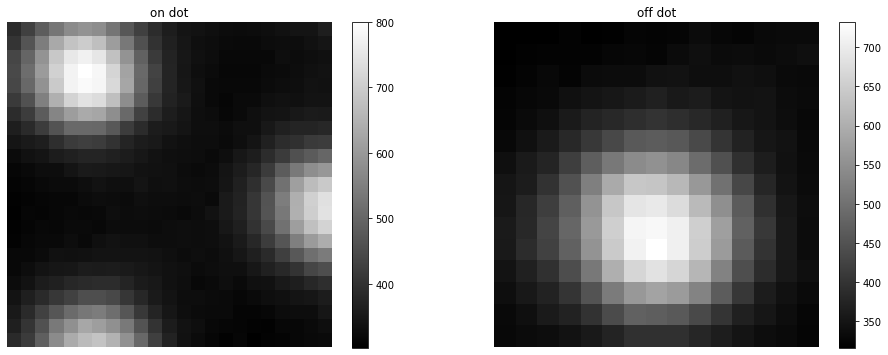

The number of mini images for cell_1_1 = 30


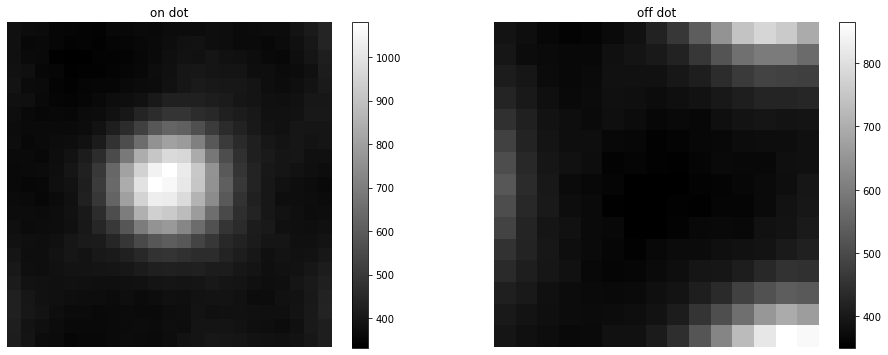

The number of mini images for cell_19_1 = 20


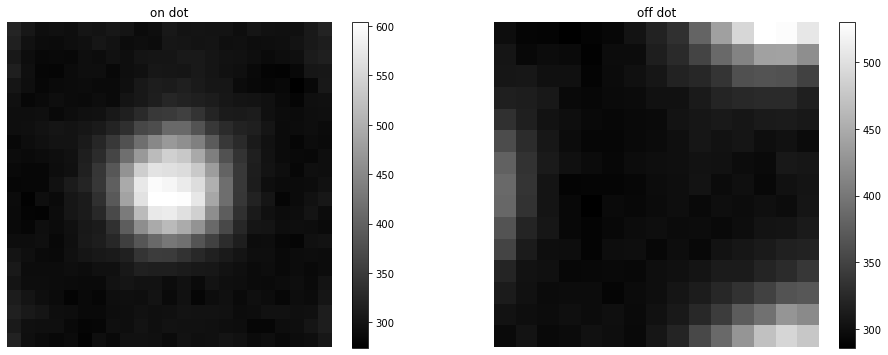

The number of mini images for cell_18_1 = 18


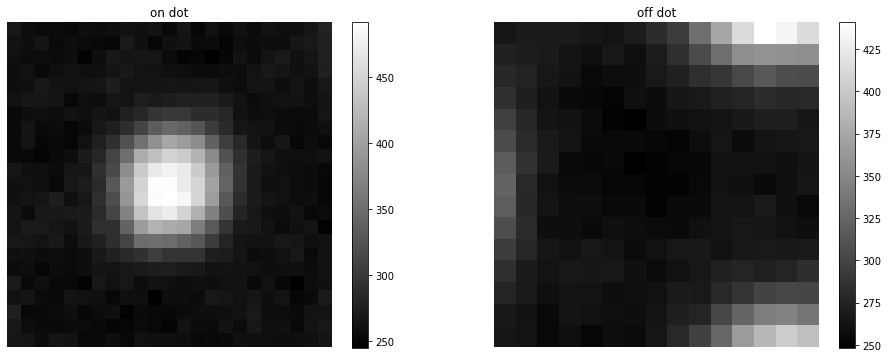

The number of mini images for cell_4_1 = 32


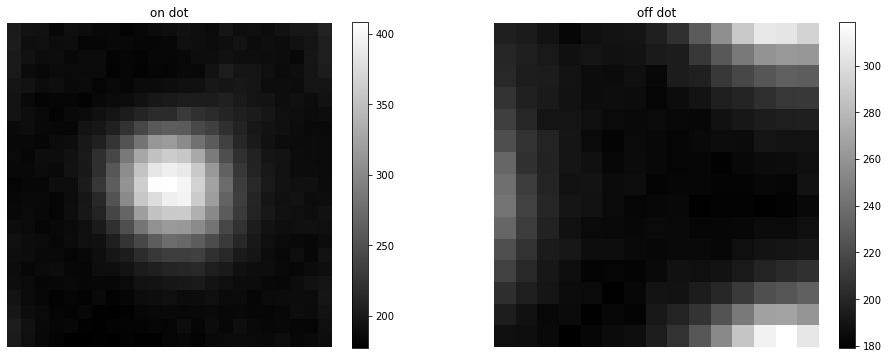

The number of mini images for cell_25_1 = 20


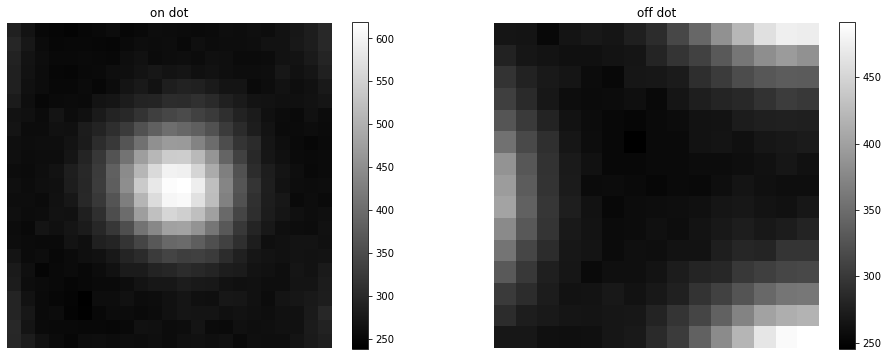

The number of mini images for cell_12_2 = 24


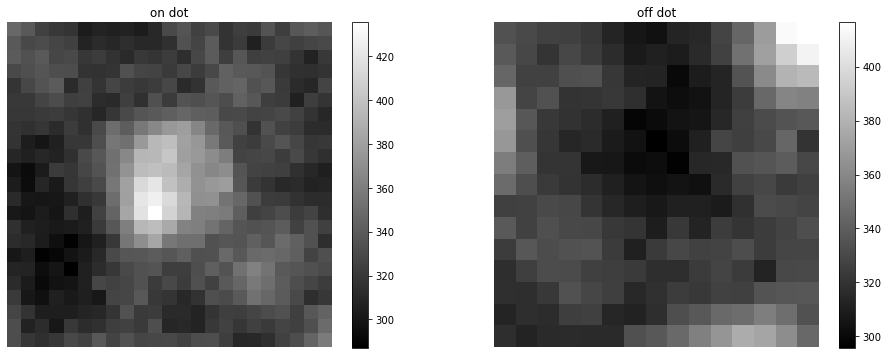

The number of mini images for cell_7_1 = 26


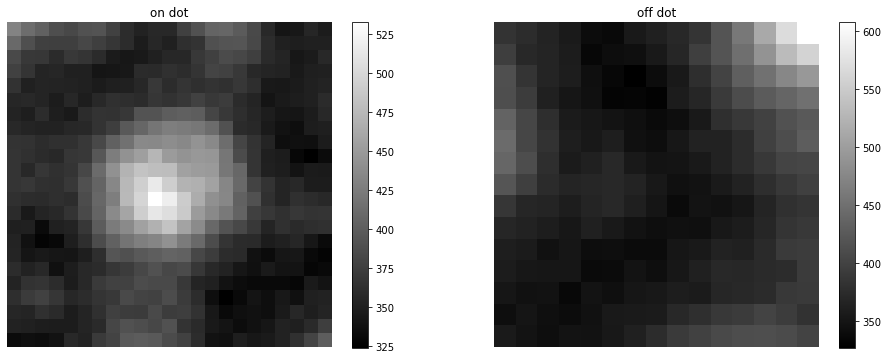

The number of mini images for cell_11_2 = 24


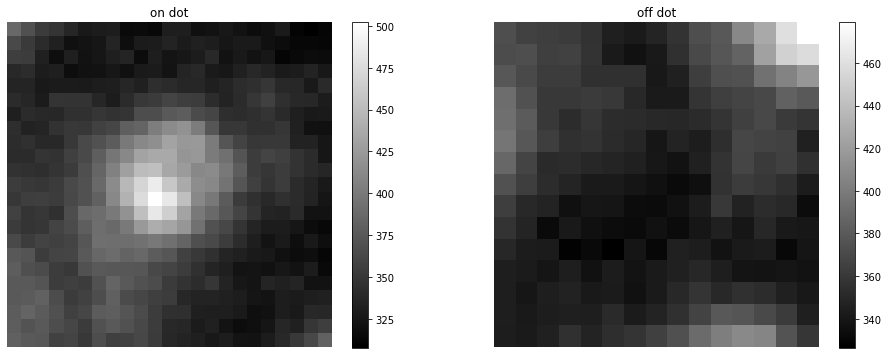

The number of mini images for cell_1_2 = 56


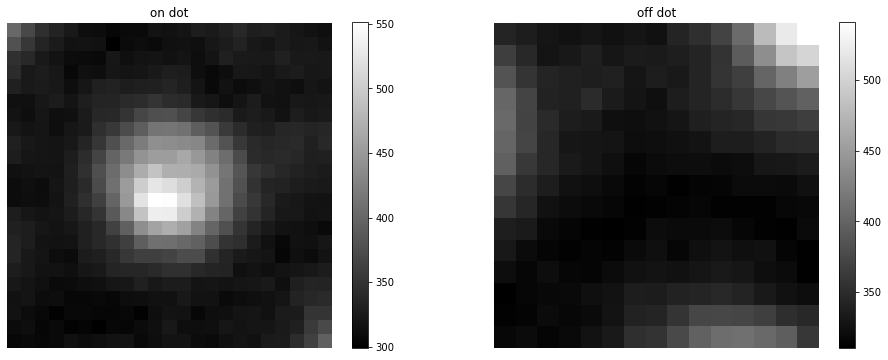

The number of mini images for cell_1_1 = 38


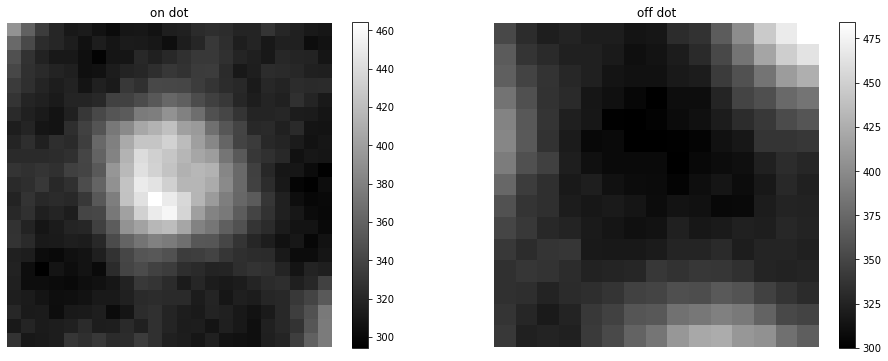

cell_12_1 has error
The number of mini images for cell_3_1 = 26


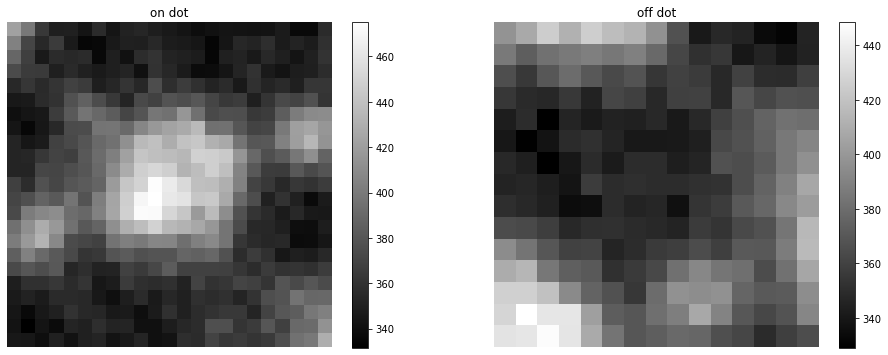

The number of mini images for cell_11_1 = 42


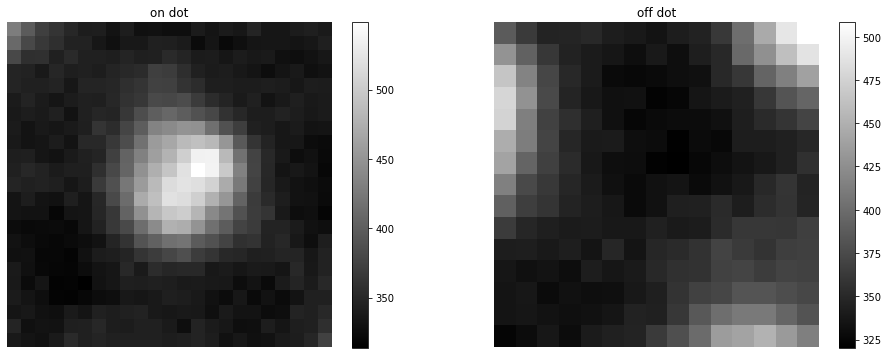

The number of mini images for cell_9_1 = 66


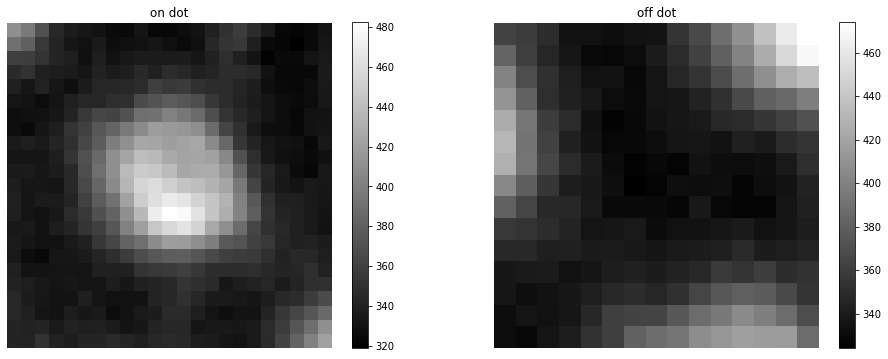

The number of mini images for cell_3_2 = 28


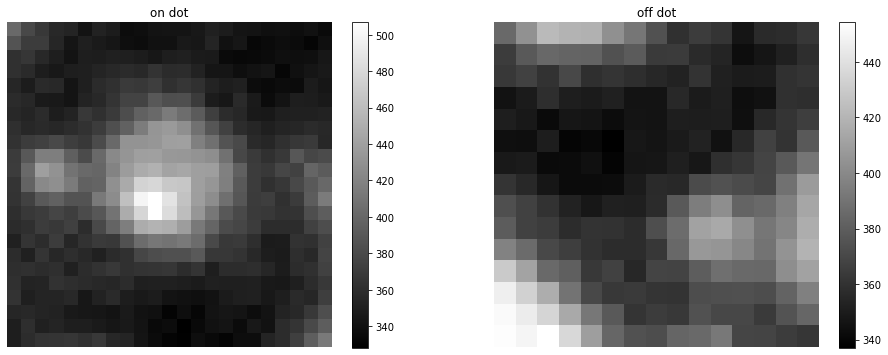

The number of mini images for cell_7_2 = 24


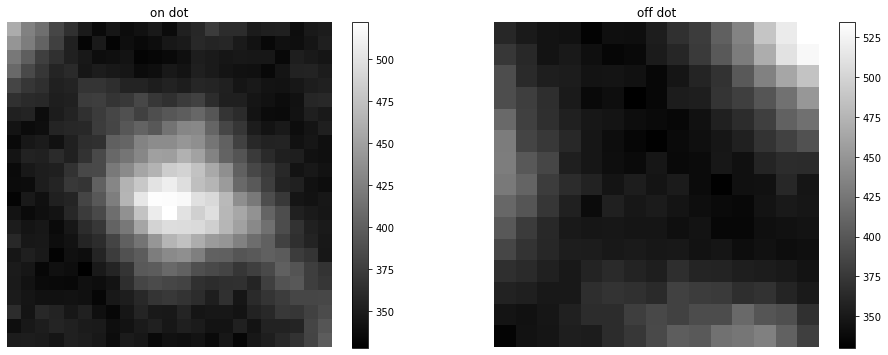

The number of mini images for cell_6_2 = 32


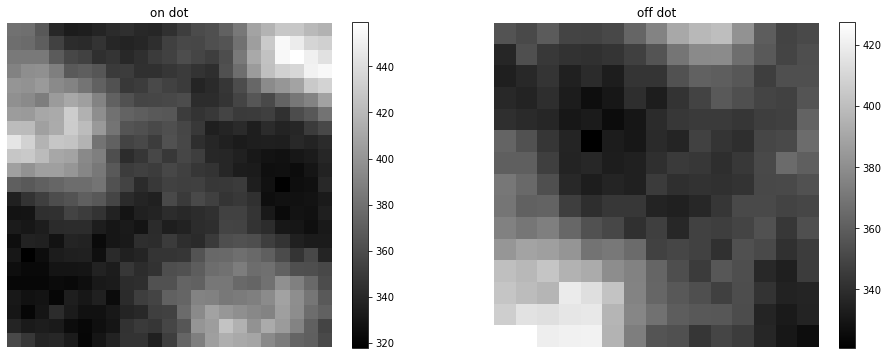

The number of mini images for cell_6_1 = 52


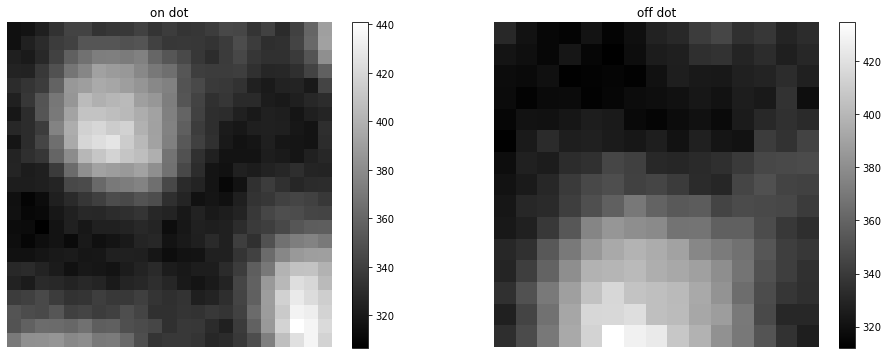

The number of mini images for cell_2_1 = 62


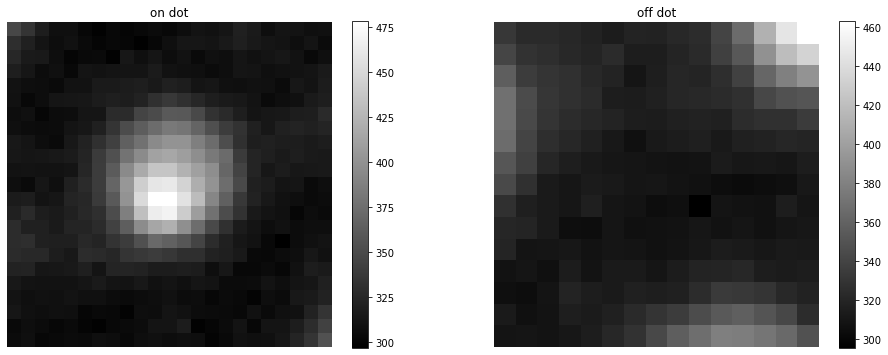

In [2]:
actin = "actin1-1.tif"
mask = "Mask.tif"
pattern = "pattern1_25im-1.tif"
l = 22
l_min = 1.5
l_max = 2.5
img_scale = 10

for date in ['data_20190208', 'data_20190326']:
    Cells = [cell for cell in [f.name for f in os.scandir("data/{}".format(date)) if f.is_dir()]
             if fnmatch.fnmatch(cell, 'cell_*')]
    for cell in Cells:
        
        try:

            # Read the image to be cut and the mask you will cut on
            Actin = io.imread('data/{}/{}/{}'.format(date, cell, actin))
            Pattern = io.imread('data/{}/{}/{}'.format(date, cell, pattern))
            Mask = io.imread('data/{}/{}/{}'.format(date, cell, mask))

            # Localize each dot on the lattice and make shifted set of dots
            lattice = Lattice(coordinates = 'data/{}/{}/coordinates.csv'.format(date, cell), l_min = l_min, l_max = l_max)
            simulated_dots, shifted_simulated_dots = lattice.simulate(dots = 'both')

            # Create the two stacks of binary images to check the pattern
            mini_images = Binary_Squares(img = Pattern,
                                         coordinate = 'data/{}/{}/coordinates.csv'.format(date, cell),
                                         l = l,
                                         img_scale = img_scale,
                                         l_min = l_min,
                                         l_max = l_max)

            pattern_dots, pattern_shifted_dots = mini_images.masked_squares(Mask)


            # Create the two stacks of binary images for actin
            mini_images = Binary_Squares(img = Actin,
                                         coordinate = 'data/{}/{}/coordinates.csv'.format(date, cell),
                                         l = l,
                                         img_scale = img_scale,
                                         l_min = l_min,
                                         l_max = l_max)

            actin_dots, actin_shifted_dots = mini_images.masked_squares(Mask)

            print('The number of mini images for {} = {}'.format(cell, 2*pattern_dots.shape[0]))

            # display the average of the pattern to verify the quality of the localization
            plt.figure(figsize=(16,6))

            plt.subplot(121)
            plt.imshow(np.mean(pattern_dots, axis= 0), cmap ='gray')
            plt.axis('off')
            plt.title('on dot')
            plt.colorbar()

            plt.subplot(122)
            plt.imshow(np.mean(pattern_shifted_dots, axis= 0), cmap ='gray')
            plt.axis('off')
            plt.title('off dot')
            plt.colorbar()

            plt.show();

            # Save the pattern stack
            imsave("data/actin_comparison/{}_{}_pattern_dots.tif".format(date, cell), pattern_dots)
            imsave("data/actin_comparison/{}_{}_pattern_shifted_dots.tif".format(date, cell), pattern_shifted_dots)

            # Save the actin stack
            imsave("data/actin_comparison/{}_{}_actin_dots.tif".format(date, cell), actin_dots)
            imsave("data/actin_comparison/{}_{}_actin_shifted_dots.tif".format(date, cell), actin_shifted_dots)
            
        except:
            print('{} has error'.format(cell))

In [32]:
actin = "actin1-1.tif"
mask = "Mask.tif"
pattern = "pattern1_25im-1.tif"
date = "data_20190208"
cell = "cell_1_1"
l = 30
l_min = 1.5
l_max = 2.5
img_scale = 10

In [33]:
# Read the image to be cut and the mask you will cut on
Actin = io.imread('data/{}/{}/{}'.format(date, cell, actin))
Pattern = io.imread('data/{}/{}/{}'.format(date, cell, pattern))
Mask = io.imread('data/{}/{}/{}'.format(date, cell, mask))

In [34]:
# Localize each dot on the lattice and make shifted set of dots
lattice = Lattice(coordinates = 'data/{}/{}/coordinates.csv'.format(date, cell), l_min = l_min, l_max = l_max)
simulated_dots, shifted_simulated_dots = lattice.simulate(dots = 'both')

In [35]:
# Create the two stacks of binary images to check the pattern
mini_images = Binary_Squares(img = Pattern,
                             coordinate = 'data/{}/{}/coordinates.csv'.format(date, cell),
                             l = l,
                             img_scale = img_scale,
                             l_min = l_min,
                             l_max = l_max)
        
pattern_dots, pattern_shifted_dots = mini_images.masked_squares(Mask)
        
        
# Create the two stacks of binary images for actin
mini_images = Binary_Squares(img = Actin,
                             coordinate = 'data/{}/{}/coordinates.csv'.format(date, cell),
                             l = l,
                             img_scale = img_scale,
                             l_min = l_min,
                             l_max = l_max)
        
actin_dots, actin_shifted_dots = mini_images.masked_squares(Mask)
 

print('The number of mini images for {} = {}'.format(cell, 2*pattern_dots.shape[0]))

KeyboardInterrupt: 

In [ ]:
# display the average of the pattern to verify the quality of the localization
plt.figure(figsize=(16,6))
        
plt.subplot(121)
plt.imshow(np.mean(pattern_dots, axis= 0), cmap ='gray')
plt.axis('off')
plt.title('on dot')
plt.colorbar()

plt.subplot(122)
plt.imshow(np.mean(pattern_shifted_dots, axis= 0), cmap ='gray')
plt.axis('off')
plt.title('off dot')
plt.colorbar()

plt.show();

In [ ]:
# display the average of the ACTIN
plt.figure(figsize=(16,6))
        
plt.subplot(121)
plt.imshow(np.mean(actin_dots, axis= 0), cmap ='gray')
plt.axis('off')
plt.title('on dot')
plt.colorbar()
   
plt.subplot(122)
plt.imshow(np.mean(actin_shifted_dots, axis= 0), cmap ='gray')
plt.axis('off')
plt.title('off dot')
plt.colorbar();

In [ ]:
# Save the pattern stack
imsave("data/actin_comparison/{}_{}_pattern_dots.tif".format(date, cell), pattern_dots)
imsave("data/actin_comparison/{}_{}_pattern_shifted_dots.tif".format(date, cell), pattern_shifted_dots)

# Save the actin stack
imsave("data/actin_comparison/{}_{}_actin_dots.tif".format(date, cell), actin_dots)
imsave("data/actin_comparison/{}_{}_actin_shifted_dots.tif".format(date, cell), actin_shifted_dots)